_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
income.head()
# Need All ['geo', 'time', 'income_per_person_gdppercapita_ppp_inflation_adjusted']

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [29]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [30]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
population.head()
# Need All ['geo', 'time', 'population_total']

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [31]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
entities.head(10)
# Need ['world_6region', 'name', ]

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america
5,akr_a_dhe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Akrotiri and Dhekelia,Akrotiri_Dhekelia,i2,NaN,True,NaN,NaN,NaN,NaN,coastline,NaN,NaN,NaN,Akrotiri and Dhekelia,NaN,False,NaN,NaN,europe,europe_central_asia
6,ala,NaN,√Öland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Åland,AX,i258,NaN,True,AX,ALA,248.0,NaN,coastline,60.25000,20.00000,NaN,Åland,NaN,False,AX,AALAND ISLANDS,europe,europe_central_asia
7,alb,NaN,NaN,NaN,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,others,Albania,AL,i3,upper_middle_income,True,AL,ALB,8.0,NaN,coastline,41.00000,20.00000,muslim,Albania,ALBANIA,True,AL,ALBANIA,europe,europe_central_asia
8,and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Andorra,AD,i6,high_income,True,AD,AND,20.0,NaN,landlocked,42.50779,1.52109,christian,Andorra,NaN,True,AD,ANDORRA,europe,europe_central_asia
9,ant,NaN,Neth. Antilles,NaN,NaN,Netherland Antilles,NaN,NaN,NaN,NaN,NaN,NaN,others,Netherlands Antilles,AN,i157,NaN,True,NaN,NaN,NaN,NaN,coastline,NaN,NaN,NaN,Netherlands Antilles,NaN,False,NaN,NETHERLANDS ANTILLES,americas,america


In [0]:
# Merge

In [32]:
merged = pd.merge(income, lifespan)
merged.head(5)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [33]:
df = pd.merge(merged, population)
print(df.shape)
df.head(5)

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [34]:
df = pd.merge(df, 
              entities[['country', 'name', 'world_6region']], left_on='geo', right_on='country')
print(df.shape)
df.head(5)

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [35]:
df = df.rename(columns = {'country': 'country_code','time': 'year', 'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
                          'life_expectancy_years': 'lifespan','population_total': 'population','name': 'country', 'world_6region': '6region'})

df.head()

,geo,year,income,lifespan,population,country_code,country,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [36]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [37]:
df.describe(exclude='number')

,geo,country_code,country,6region
count,40437,40437,40437,40437
unique,187,187,187,6
top,nzl,nzl,Brunei,europe_central_asia
freq,219,219,219,10778


Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
import seaborn as sns

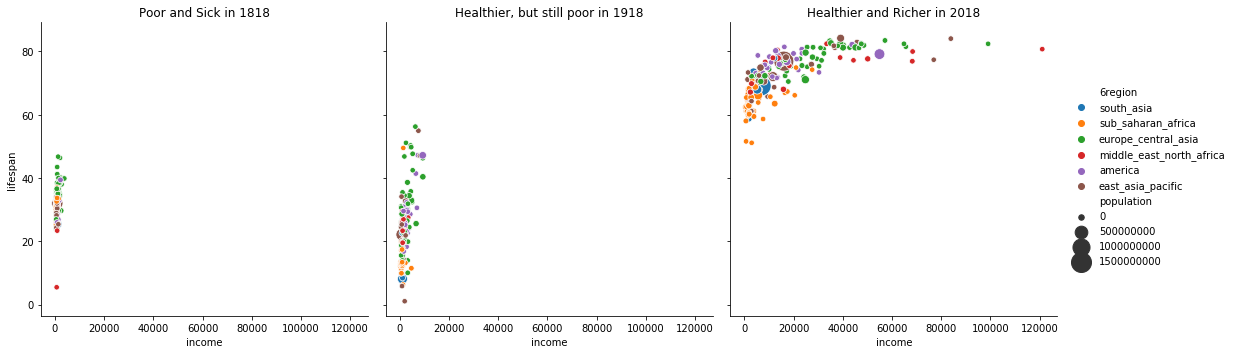

In [43]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

fig = sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818')
axes[1].set_title('Healthier, but still poor in 1918')
axes[2].set_title('Healthier and Richer in 2018');

In [45]:
df['6region'].value_counts()

europe_central_asia         10778
sub_saharan_africa          10512
america                      7274
east_asia_pacific            5741
middle_east_north_africa     4380
south_asia                   1752
Name: 6region, dtype: int64

In [0]:
sle_region = ['europe_central_asia', 'america']
region_sub = df[df['6region'].isin(sle_region)]
#region_sub

In [0]:
years = [1818, 1868, 1918, 1968, 2018]
centuries = df[df.year.isin(years)]

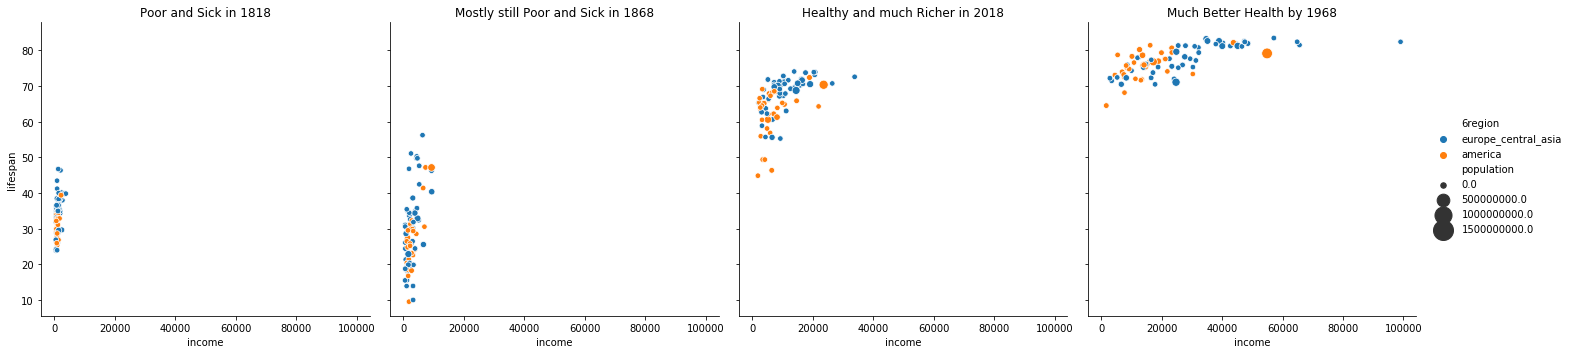

In [73]:
fig = sns.relplot(x='income', y='lifespan', hue=region_sub['6region'], size='population', 
                  sizes=(30,400), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818')
axes[1].set_title('Mostly still Poor and Sick in 1868')
axes[2].set_title('Healthier, but poor in 1918')
axes[3].set_title('Much Better Health by 1968')
axes[2].set_title('Healthy and much Richer in 2018');


In [0]:
sle_region = ['europe_central_asia', 'america']
region_sub = df[df['6region'].isin(sle_region)]
#region_sub

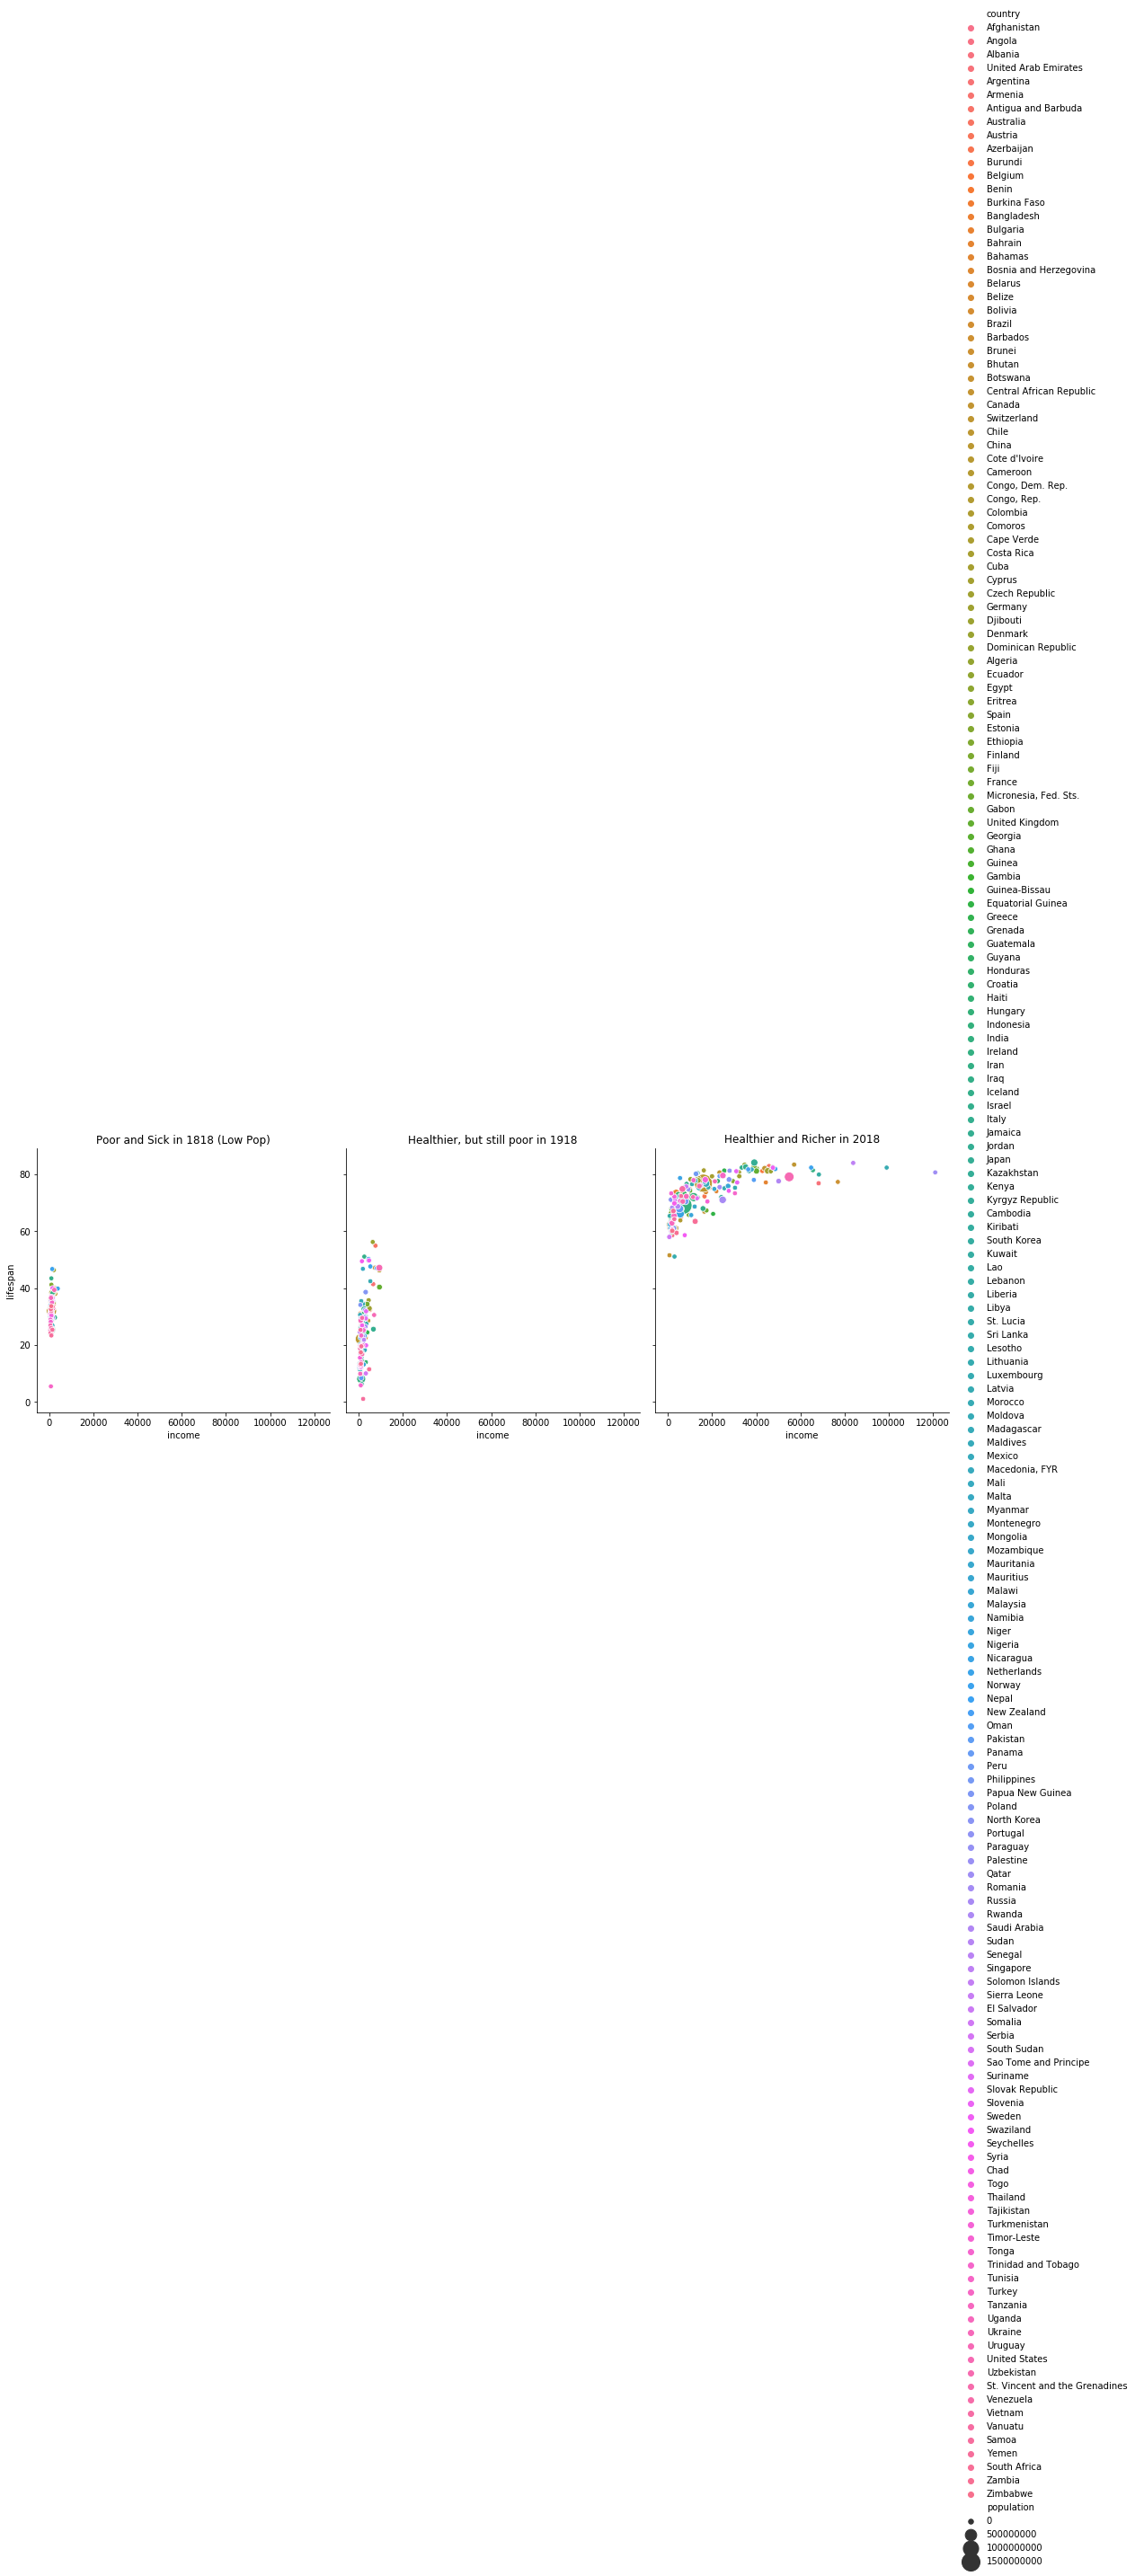

In [66]:
fig = sns.relplot(x='income', y='lifespan', hue='country', size='population', 
                  sizes=(30,400), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818 (Low Pop)')
axes[1].set_title('Healthier, but still poor in 1918')
axes[2].set_title('Healthier and Richer in 2018');

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [78]:
%matplotlib notebook
title = 'USA Health over time'
x = np.array(df.index)
y = np.array(df['lifespan'])
usa_health = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
df.columns = {title}

KeyError: ignored

In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [0]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

In [0]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [0]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [0]:
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)